# Challenge Set 1:  MTA Turnstile Data

In [1]:
from __future__ import print_function, division

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import datetime

#### Exercise 1.1

- Open up a new Jupyter notebook
- Download a few MTA turnstile data files
- Open up a file, use csv reader to read it, make a python dict where
  there is a key for each (C/A, UNIT, SCP, STATION). These are the
  first four columns. The value for this key should be a list of
  lists. Each list in the list is the rest of the columns in a
  row. For example, one key-value pair should look like


{    ('A002','R051','02-00-00','LEXINGTON AVE'):
[
['NQR456', 'BMT', '01/03/2015', '03:00:00', 'REGULAR', '0004945474', '0001675324'],
['NQR456', 'BMT', '01/03/2015', '07:00:00', 'REGULAR', '0004945478', '0001675333'],
['NQR456', 'BMT', '01/03/2015', '11:00:00', 'REGULAR', '0004945515', '0001675364'],
...
]
}

In [4]:
#OPTION 1 --- Let's work with a BIG data set :)
# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [160903, 160910, 160917]
turnstiles_df = get_data(week_nums)

In [5]:
my_string = "Hello, {}. Are you {} to be learning {}?"
print(my_string.format("Lara", "delighted", "Python"))

Hello, Lara. Are you delighted to be learning Python?


In [6]:
#OPTION 2 --- Let's work with a smaller data set :)
#turnstiles_df = pd.read_csv("June30.txt")

In [7]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,00:00:00,REGULAR,5799442,1966041
1,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,04:00:00,REGULAR,5799463,1966044
2,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,08:00:00,REGULAR,5799492,1966079
3,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,12:00:00,REGULAR,5799610,1966155
4,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,16:00:00,REGULAR,5799833,1966214


In [8]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [9]:
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]

In [10]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [11]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,00:00:00,REGULAR,5799442,1966041
1,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,04:00:00,REGULAR,5799463,1966044
2,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,08:00:00,REGULAR,5799492,1966079
3,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,12:00:00,REGULAR,5799610,1966155
4,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,16:00:00,REGULAR,5799833,1966214


In [12]:
turnstiles_df.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
192873,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/16/2016,05:00:00,REGULAR,5554,271
192874,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/16/2016,09:00:00,REGULAR,5554,271
192875,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/16/2016,13:00:00,REGULAR,5554,271
192876,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/16/2016,17:00:00,REGULAR,5554,271
192877,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/16/2016,21:00:00,REGULAR,5554,271


In [13]:
# Three weeks of Data
turnstiles_df.DATE.value_counts().sort_index()

08/27/2016    27290
08/28/2016    27300
08/29/2016    27828
08/30/2016    27775
08/31/2016    27352
09/01/2016    28116
09/02/2016    27478
09/03/2016    27353
09/04/2016    27304
09/05/2016    27325
09/06/2016    28826
09/07/2016    27977
09/08/2016    28137
09/09/2016    27956
09/10/2016    27325
09/11/2016    27334
09/12/2016    28074
09/13/2016    27343
09/14/2016    27359
09/15/2016    27283
09/16/2016    28160
Name: DATE, dtype: int64


#### Exercise 1.2

- Let's turn this into a time series.

 For each key (basically the control area, unit, device address and
 station of a specific turnstile), have a list again, but let the list
 be comprised of just the point in time and the count of entries.

This basically means keeping only the date, time, and entries fields
in each list. You can convert the date and time into datetime objects
-- That is a python class that represents a point in time. You can
combine the date and time fields into a string and use the
[dateutil](https://labix.org/python-dateutil) module to convert it
into a datetime object. For an example check
[this StackOverflow question](http://stackoverflow.com/questions/23385003/attributeerror-when-using-import-dateutil-and-dateutil-parser-parse-but-no).

Your new dict should look something like

{    ('A002','R051','02-00-00','LEXINGTON AVE'):
[
[datetime.datetime(2013, 3, 2, 3, 0), 3788],
[datetime.datetime(2013, 3, 2, 7, 0), 2585],
[datetime.datetime(2013, 3, 2, 12, 0), 10653],
[datetime.datetime(2013, 3, 2, 17, 0), 11016],
[datetime.datetime(2013, 3, 2, 23, 0), 10666],
[datetime.datetime(2013, 3, 3, 3, 0), 10814],
[datetime.datetime(2013, 3, 3, 7, 0), 10229],
...
],
....
}

In [14]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [15]:
from datetime import datetime as dt

In [16]:
mask = ((turnstiles_df["C/A"] == "A002") & 
        (turnstiles_df["UNIT"] == "R051") & 
        (turnstiles_df["SCP"] == "02-00-00") & 
        (turnstiles_df["STATION"] == "59 ST"))

turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,00:00:00,REGULAR,5799442,1966041
1,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,04:00:00,REGULAR,5799463,1966044
2,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,08:00:00,REGULAR,5799492,1966079
3,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,12:00:00,REGULAR,5799610,1966155
4,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,16:00:00,REGULAR,5799833,1966214


In [17]:
# Take the date and time fields into a single datetime column
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, format="%m/%d/%Y %H:%M:%S")

In [18]:
mask = ((turnstiles_df["C/A"] == "R626") & 
(turnstiles_df["UNIT"] == "R062") & 
(turnstiles_df["SCP"] == "00-00-00") & 
(turnstiles_df["STATION"] == "CROWN HTS-UTICA"))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
186607,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,08/27/2016,00:00:00,REGULAR,12079591,2684445,2016-08-27 00:00:00
186608,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,08/27/2016,04:00:00,REGULAR,12079636,2684479,2016-08-27 04:00:00
186609,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,08/27/2016,08:00:00,REGULAR,12079894,2684489,2016-08-27 08:00:00
186610,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,08/27/2016,12:00:00,REGULAR,12080369,2684533,2016-08-27 12:00:00
186611,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,08/27/2016,16:00:00,REGULAR,12080831,2684606,2016-08-27 16:00:00


In [19]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
513722,R504,R276,00-00-01,VERNON-JACKSON,2016-09-16 08:00:00,2
0,A002,R051,02-00-00,59 ST,2016-08-27 00:00:00,1
387264,R155,R116,01-00-03,50 ST,2016-09-15 20:00:00,1
387259,R155,R116,01-00-03,50 ST,2016-09-15 00:00:00,1
387260,R155,R116,01-00-03,50 ST,2016-09-15 04:00:00,1


In [20]:
# On 9/16, we seem to have two entries for same time.  Let's take a look
mask = ((turnstiles_df["C/A"] == "R504") & 
(turnstiles_df["UNIT"] == "R276") & 
(turnstiles_df["SCP"] == "00-00-01") & 
(turnstiles_df["STATION"] == "VERNON-JACKSON") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2016, 9, 16).date()))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
170562,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,09/16/2016,00:00:00,REGULAR,8137913,1333972,2016-09-16 00:00:00
170563,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,09/16/2016,04:00:00,REGULAR,8137913,1333975,2016-09-16 04:00:00
170564,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,09/16/2016,08:00:00,REGULAR,8138271,1334066,2016-09-16 08:00:00
170565,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,09/16/2016,08:00:00,RECOVR AUD,8138271,16735026,2016-09-16 08:00:00
170566,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,09/16/2016,12:00:00,REGULAR,8139437,1334196,2016-09-16 12:00:00


* Looks to be a incorrect AUD entry.  May be we should just select the Regular One.

In [21]:
turnstiles_df.DESC.value_counts()

REGULAR       579109
RECOVR AUD      1786
Name: DESC, dtype: int64

* Since we are only interested in Entries, we might be OK.

In [22]:
# Get rid of the duplicate entry
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True, \
                          ascending=False)
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [23]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2016-08-27 00:00:00,1
387266,R155,R116,01-00-03,50 ST,2016-09-16 04:00:00,1
387260,R155,R116,01-00-03,50 ST,2016-09-15 04:00:00,1
387261,R155,R116,01-00-03,50 ST,2016-09-15 08:00:00,1
387262,R155,R116,01-00-03,50 ST,2016-09-15 12:00:00,1


* No more duplicate Entries

In [24]:
# Drop Exits and Desc Column.  To prevent errors in multiple run of cell, 
# errors on drop is ignored (e.g. if some columns were dropped already)
turnstiles_df = turnstiles_df.drop(["EXITS", "DESC"], axis=1, errors="ignore")

#### Exercise 1.3

- These counts are for every n hours. (What is n?) We want total daily
  entries.

Now make it that we again have the same keys, but now we have a single
value for a single day, which is the total number of passengers that
entered through this turnstile on this day.

In [25]:
turnstiles_daily = turnstiles_df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"])\
.ENTRIES.first().reset_index()

In [26]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,08/27/2016,5800121
1,A002,R051,02-00-00,59 ST,08/28/2016,5800798
2,A002,R051,02-00-00,59 ST,08/29/2016,5802336
3,A002,R051,02-00-00,59 ST,08/30/2016,5803875
4,A002,R051,02-00-00,59 ST,08/31/2016,5805383


In [27]:
# .groupby returns a group object whose values are the index values belonging to that group
turnstiles_daily.groupby(["C/A", "UNIT", "SCP", "STATION"]).groups
                                                      

{('A002',
  'R051',
  '02-00-00',
  '59 ST'): Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
             19, 20],
            dtype='int64'),
 ('A002',
  'R051',
  '02-00-01',
  '59 ST'): Int64Index([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
             38, 39, 40, 41],
            dtype='int64'),
 ('A002',
  'R051',
  '02-03-00',
  '59 ST'): Int64Index([42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58,
             59, 60, 61, 62],
            dtype='int64'),
 ('A002',
  'R051',
  '02-03-01',
  '59 ST'): Int64Index([63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79,
             80, 81, 82, 83],
            dtype='int64'),
 ('A002',
  'R051',
  '02-03-02',
  '59 ST'): Int64Index([ 84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
              97,  98,  99, 100, 101, 102, 103, 104],
            dtype='int64'),
 ('A002',
  'R051',
  '02-03-03',
  '59 ST'): Int64Index([105, 106, 1

In [28]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .transform(lambda grp: grp.shift(1)))
# transform() takes a function as parameter
# shift moves the index by the number of periods given (positive or negative)

In [29]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,08/27/2016,5800121,NaN,NaN
1,A002,R051,02-00-00,59 ST,08/28/2016,5800798,08/27/2016,5800121.0
2,A002,R051,02-00-00,59 ST,08/29/2016,5802336,08/28/2016,5800798.0
3,A002,R051,02-00-00,59 ST,08/30/2016,5803875,08/29/2016,5802336.0
4,A002,R051,02-00-00,59 ST,08/31/2016,5805383,08/30/2016,5803875.0


In [30]:
turnstiles_daily.tail()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
95997,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/12/2016,5554,09/11/2016,5554.0
95998,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/13/2016,5554,09/12/2016,5554.0
95999,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/14/2016,5554,09/13/2016,5554.0
96000,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/15/2016,5554,09/14/2016,5554.0
96001,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/16/2016,5554,09/15/2016,5554.0


In [31]:
# Drop the rows for last date
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)
# axis = 0 means index (=1 means column)

In [32]:
# let's check that the number of entries for today is higher than entries for yesterday
turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
715,A011,R080,01-00-00,57 ST-7 AV,08/28/2016,887688133,08/27/2016,887689608.0
716,A011,R080,01-00-00,57 ST-7 AV,08/29/2016,887685714,08/28/2016,887688133.0
717,A011,R080,01-00-00,57 ST-7 AV,08/30/2016,887683207,08/29/2016,887685714.0
718,A011,R080,01-00-00,57 ST-7 AV,08/31/2016,887680260,08/30/2016,887683207.0
719,A011,R080,01-00-00,57 ST-7 AV,09/01/2016,887677354,08/31/2016,887680260.0


In [33]:
# What's the deal with counter being in reverse
mask = ((turnstiles_df["C/A"] == "A011") & 
(turnstiles_df["UNIT"] == "R080") & 
(turnstiles_df["SCP"] == "01-00-00") & 
(turnstiles_df["STATION"] == "57 ST-7 AV") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2016, 8, 27).date())) 
# datetime is both name of module and name of constructor of datetime object
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME
1446,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,20:00:00,887689608,2016-08-27 20:00:00
1445,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,16:00:00,887690085,2016-08-27 16:00:00
1444,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,12:00:00,887690472,2016-08-27 12:00:00
1443,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,08:00:00,887690738,2016-08-27 08:00:00
1442,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,04:00:00,887690800,2016-08-27 04:00:00


* Counter working in Reverse??? - WHHHAT

In [34]:
# Let's see how many stations have this problem

(turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
     .size()) # size() behaves same as if we'd done .DATE.count() 

C/A    UNIT  SCP       STATION        
A011   R080  01-00-00  57 ST-7 AV         20
             01-00-04  57 ST-7 AV         17
             01-00-05  57 ST-7 AV         20
A016   R081  03-06-01  49 ST               1
A025   R023  01-03-02  34 ST-HERALD SQ    20
A049   R088  02-05-00  CORTLANDT ST       15
A066   R118  00-00-00  CANAL ST           20
C019   R232  00-00-02  45 ST              20
H003   R163  01-00-02  6 AV               20
H023   R236  00-06-00  DEKALB AV          20
J034   R007  00-00-02  104 ST             20
JFK01  R535  00-00-01  HOWARD BCH JFK      1
             00-00-02  HOWARD BCH JFK      1
             00-00-03  HOWARD BCH JFK      2
JFK02  R535  01-00-01  HOWARD BCH JFK      1
             01-00-02  HOWARD BCH JFK      1
             01-00-03  HOWARD BCH JFK      1
             01-00-04  HOWARD BCH JFK      1
             01-00-05  HOWARD BCH JFK      1
             01-00-06  HOWARD BCH JFK      1
JFK03  R536  00-00-01  JFK JAMAICA CT1     2
             00-

In [35]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        return 0
    return counter

# If counter is > 1 million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
_ = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000) 

# apply takes a function as parameter and applies it along the given axis (1=apply by row) 
# apply takes care of passing each row to the function

194 1894869683.0
262183 67111299.0
63 1054429.0
2862 2044694.0
1912607049 7509132.0
285 1494569141.0
2542 14129479.0
67108864 0.0
335600216 1374824.0
36 3252790.0
1117 3665497.0
262269 10823938.0
1452 1460387.0
1154413610 8957775.0
100665773 35655801.0
1443 1014193.0
186916568 604712476.0
874 6130902.0
598 11078528.0
1160 74672293.0
0 117440532.0
100663296 1299.0
117440514 100663296.0
2123 9170483.0
428 2336204.0
1024 12498870.0


In [36]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
        # if current entries is bad, use yesterday's count as proxy
    if counter > max_counter:
        # Check it again to make sure we are not giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

194 1894869683.0
262183 67111299.0
63 1054429.0
2862 2044694.0
1912607049 7509132.0
285 1494569141.0
2542 14129479.0
67108864 0.0
335600216 1374824.0
36 3252790.0
1117 3665497.0
262269 10823938.0
1452 1460387.0
1154413610 8957775.0
100665773 35655801.0
1443 1014193.0
186916568 604712476.0
874 6130902.0
598 11078528.0
1160 74672293.0
0 117440532.0
100663296 1299.0
117440514 100663296.0
2123 9170483.0
428 2336204.0
1024 12498870.0


In [37]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,08/28/2016,5800798,08/27/2016,5800121.0,677.0
2,A002,R051,02-00-00,59 ST,08/29/2016,5802336,08/28/2016,5800798.0,1538.0
3,A002,R051,02-00-00,59 ST,08/30/2016,5803875,08/29/2016,5802336.0,1539.0
4,A002,R051,02-00-00,59 ST,08/31/2016,5805383,08/30/2016,5803875.0,1508.0
5,A002,R051,02-00-00,59 ST,09/01/2016,5806990,08/31/2016,5805383.0,1607.0


In [38]:
turnstiles_daily.shape

(91424, 9)

In [39]:
#Trying to check if there are any zeros in the list even though I believe there should be
check0 = (turnstiles_daily['ENTRIES'] == 0)
check0.value_counts(normalize = True)
#check0.value_counts()
#check0.shape
#turnstiles_df[check0]
##----
#IQR = Q3- Q1
#min*1.5
#max*1.5

False    0.982784
True     0.017216
Name: ENTRIES, dtype: float64

# CHALLENGE 4
##### We will plot the daily time series for a turnstile.


In [40]:
%matplotlib inline
import matplotlib.pyplot as plt

In [41]:
#GOAL: I want one turnstile (5 AV/59 ST and 00-00-00 [from SCP which I think reps A TURNSTILE ]

Entries_5AV59ST_Days = ((turnstiles_daily["STATION"] == "5 AV/59 ST") & (turnstiles_daily["SCP"] == "00-00-00")) #AND CERTAIN DATES?
Entries_5AV59ST_Days = turnstiles_daily[Entries_5AV59ST_Days]
Entries_5AV59ST_Days = Entries_5AV59ST_Days.drop(columns=["C/A","UNIT","SCP", "STATION", "ENTRIES", "PREV_DATE" , "PREV_ENTRIES"])
Entries_5AV59ST_Days.head(50)

,DATE,DAILY_ENTRIES
253,08/28/2016,1052.0
254,08/29/2016,1812.0
255,08/30/2016,1878.0
256,08/31/2016,1865.0
257,09/01/2016,1929.0
258,09/02/2016,1839.0
259,09/03/2016,1264.0
260,09/04/2016,1115.0
261,09/05/2016,1039.0
262,09/06/2016,1871.0


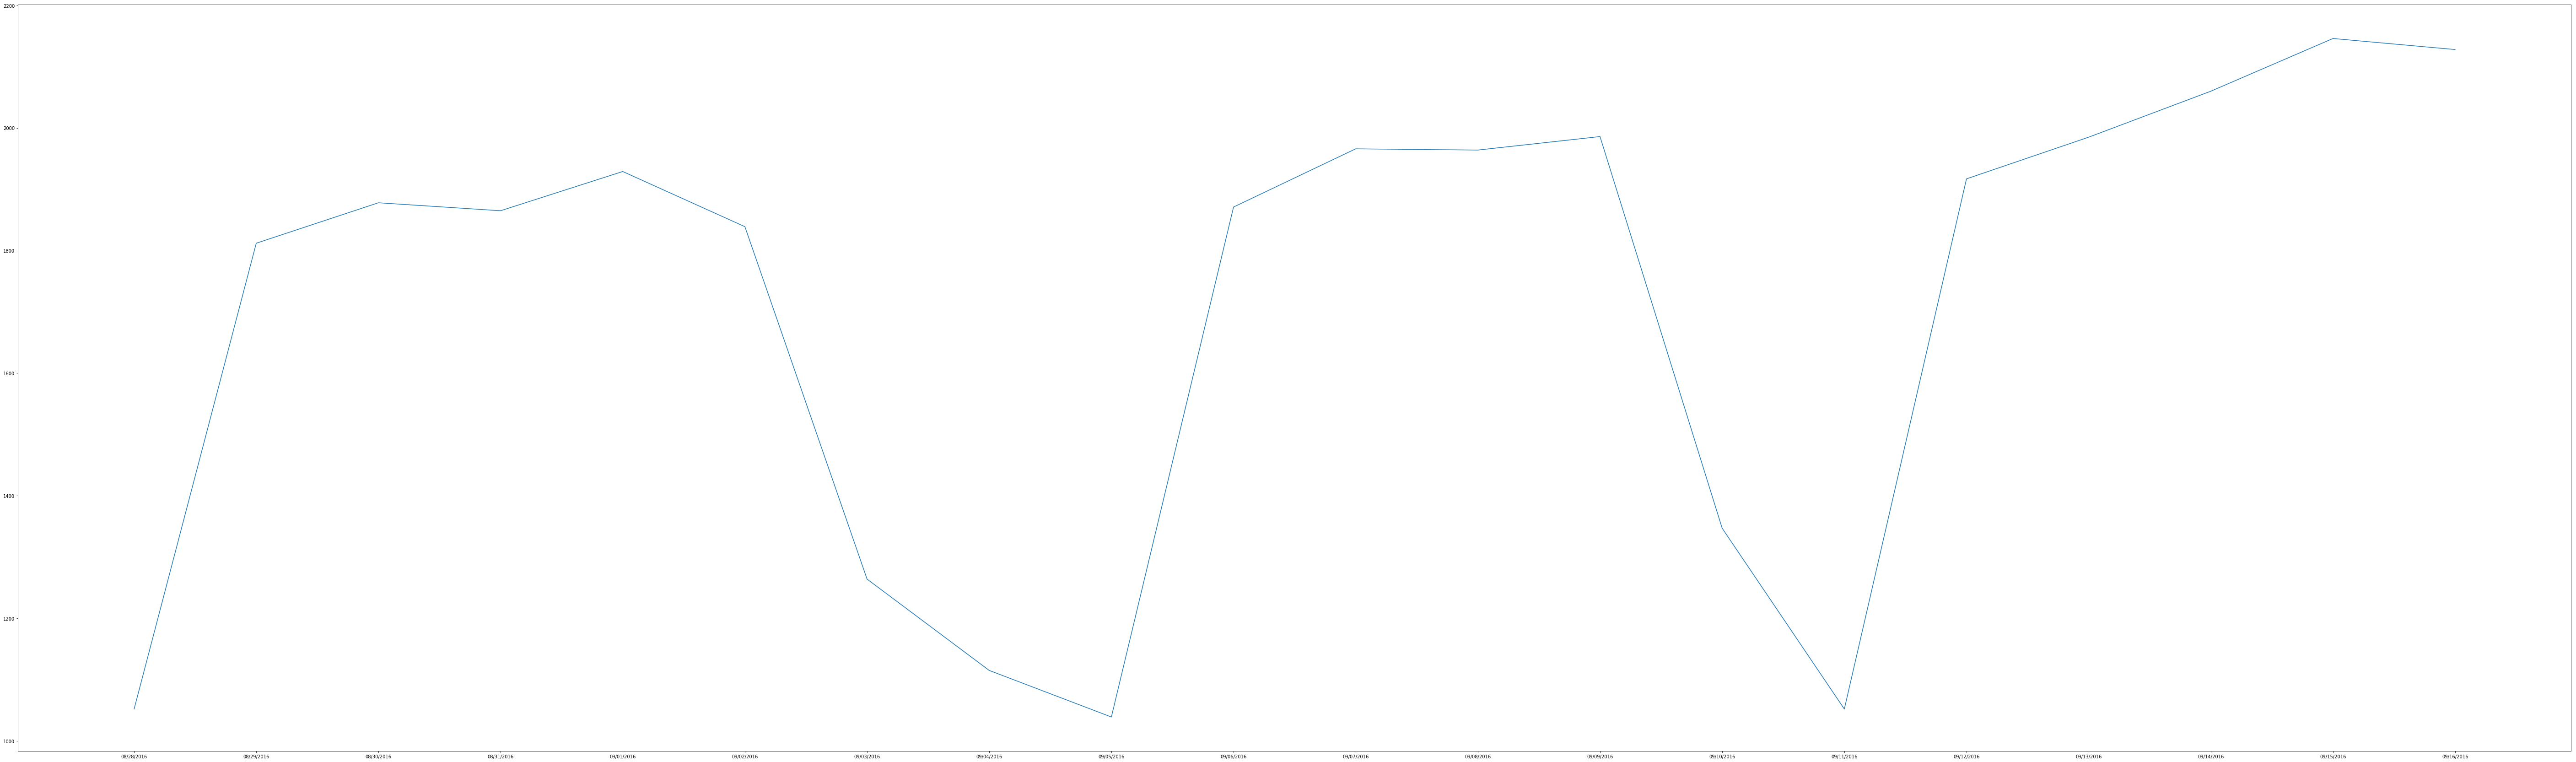

In [42]:
plt.figure(figsize=(100,30))
plt.plot(list(Entries_5AV59ST_Days["DATE"]),list(Entries_5AV59ST_Days["DAILY_ENTRIES"]))


In [43]:
#LETS COLLECT COLUMNS THAT ARE IMPORTANT FOR EASY REFERENCE:

#turnstiles_UniqueStationLineAndDayEntries = turnstiles_daily.groupby(by=["DATE", "STATION"]).sum() 
#NEEDS TO ADD LINE LATER IN A SEPARATE COLUMN BECAUSE turnstile_daily was made without Line in mind :(
turnstiles_UniqueStationAndDayEntries = turnstiles_daily.groupby(by=["DATE", "STATION"]).sum() #SUM OF ENTRIES PER STATION STATIONS BY DATES
turnstiles_singledatesum=turnstiles_daily.groupby(by=["DATE"]).sum()

DatesRepeated= turnstiles_daily['DATE'].head()
datesunique = turnstiles_daily['DATE'].unique()
Stationunique = turnstiles_daily['STATION'].unique()
countingdates = turnstiles_daily['DATE'].value_counts()


In [44]:
turnstiles_daily.groupby(by=["DATE"]).sum() #DAILY ENTRIES is Correct NOT PREV_ENTRIES OR ENTRIES

,ENTRIES,PREV_ENTRIES,DAILY_ENTRIES
DATE,,,
08/28/2016,160534716789,1.620407e+11,2781929.0
08/29/2016,160575897091,1.605708e+11,5251253.0
08/30/2016,160558007382,1.605527e+11,5690316.0
08/31/2016,160470789525,1.605581e+11,5611588.0
09/01/2016,160475115438,1.604708e+11,6550353.0
09/02/2016,160467116203,1.604731e+11,5255316.0
09/03/2016,160472215327,1.604692e+11,3492493.0
09/04/2016,160465371147,1.605801e+11,2796554.0
09/05/2016,160569126857,1.604764e+11,3011872.0


# CHALLENGE 5
#### We want to combine the numbers together -- for each ControlArea/UNIT/STATION combo, for each day, add the counts from each turnstile belonging to that combo.

In [45]:
# This question is confusing and needs more description:
# Are we being asked for CA/U/S combo for each turnsiles for one station for each day OR
# Are we being asked for CA/U/S combo for each turnsiles for ALL station for each day

# My method: I believe I did for ALL stations

In [46]:
turnstiles_CA_U_S_D = turnstiles_daily.groupby(by=["C/A","UNIT","STATION","DATE","SCP"]).sum() 
turnstiles_CA_U_S_D = turnstiles_CA_U_S_D.drop(columns=["ENTRIES","PREV_ENTRIES"])
turnstiles_CA_U_S_D.head(50)


DAILY_ENTRIES
C/A  UNIT STATION DATE       SCP                    
A002 R051 59 ST   08/28/2016 02-00-00          677.0
                             02-00-01          595.0
                             02-03-00          335.0
                             02-03-01          772.0
                             02-03-02          771.0
                             02-03-03          708.0
                             02-03-04          833.0
                             02-03-05         1422.0
                             02-03-06          913.0
                             02-05-00            0.0
                             02-05-01            0.0
                             02-06-00          870.0
                  08/29/2016 02-00-00         1538.0
                             02-00-01         1254.0
                             02-03-00          530.0
                             02-03-01         1318.0
                             02-03-02         1234.0
                             02-03-03         1233.0
                             02-03-04         1714.0
                             02-03-05         2631.0
                             02-03-06         2210.0
                             02-05-00            1.0
                             02-05-01            0.0
                             02-06-00         1799.0
                  08/30/2016 02-00-00         1539.0
                             02-00-01         1286.0
                             02-03-00          571.0
                             02-03-01         1409.0
                             02-03-02         1398.0
                             02-03-03         1400.0
                             02-03-04         1729.0
                             02-03-05         2828.0
                             02-03-06         2511.0
                             02-05-00            0.0
                             02-05-01            0.0
                             02-06-00         1951.0
                  08/31/2016 02-00-00         1508.0
                             02-00-01         1273.0
                             02-03-00          610.0
                             02-03-01         1444.0
                             02-03-02         1349.0
                             02-03-03         1422.0
                             02-03-04         1595.0
                             02-03-05         2840.0
                             02-03-06         2453.0
                             02-05-00            0.0
                             02-05-01            0.0
                             02-06-00         2063.0
                  09/01/2016 02-00-00         1607.0
                             02-00-01         1313.0

<Figure size 7200x14400 with 0 Axes>

<Figure size 432x288 with 0 Axes>

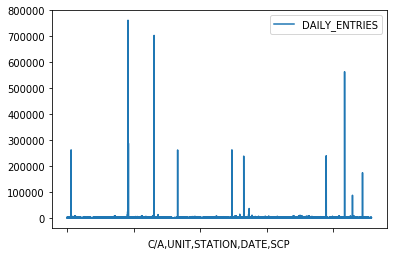

In [84]:
# Do we need to plot it?
# Also, if we do plot it, it will be really nasty because we worked with a lot of stops.

#I don't know how to work with this since I think the grouping is weird Maybe

plt.figure(figsize=(100,200))
plt.figure(); turnstiles_CA_U_S_D.plot()


# CHALLENGE 6
#### Similarly, combine everything in each station, and come up with a time series of `[(date1, count1),(date2,count2),...]` type of time series for each STATION, by adding up all the turnstiles in a station.

In [67]:
challenge6 = turnstiles_daily.groupby(by=["C/A","UNIT","SCP","STATION","DATE"]).sum() 
challenge6.head(4)
challenge6a= [] 
challenge6a= challenge6.drop(columns=["ENTRIES", "PREV_ENTRIES"])
challenge6a.head(4)

#Just Station and date and entries
#or how I have it now?

DAILY_ENTRIES
C/A  UNIT SCP      STATION DATE                     
A002 R051 02-00-00 59 ST   08/28/2016          677.0
                           08/29/2016         1538.0
                           08/30/2016         1539.0
                           08/31/2016         1508.0

# CHALLENGE 7
### Plot the time series for a station.

In [91]:
UnionData = (turnstiles_daily["STATION"] == "UNION ST")
UnionData.head(2)
UnionData=turnstiles_daily[UnionData]
UnionData.head(10)
UnionData = UnionData.drop(columns=["C/A","UNIT","SCP", "STATION", "ENTRIES", "PREV_DATE" , "PREV_ENTRIES"])  #We just want date and count We know that this data is from UNION df.drop(columns=['B', 'C'])
UnionData = UnionData.groupby(by=["DATE"]).sum()
UnionData.head(50)

,DAILY_ENTRIES
DATE,
08/28/2016,3120.0
08/29/2016,5209.0
08/30/2016,5684.0
08/31/2016,5621.0
09/01/2016,5839.0
09/02/2016,5113.0
09/03/2016,3096.0
09/04/2016,2809.0
09/05/2016,2495.0


<Figure size 7200x2160 with 0 Axes>

<Figure size 432x288 with 0 Axes>

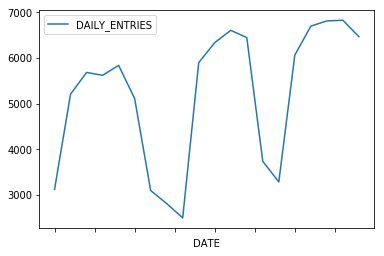

In [92]:
plt.figure(figsize=(100,30))
plt.figure(); UnionData.plot()


# CHALLENGE 8
### Plot the time series for a station.

In [94]:
turnstiles_daily('') == ('A002','R051','LEXINGTON AVE')


## Test functions
station = ('A002','R051','LEXINGTON AVE')
week1 = [entry for date, entry in sorted(station_total[station])]

plt.plot(week1)

#Entries_5AV59ST_Days -- While we are not by the 7th index, add the curr day to Week1_5AV59ST_Days
#then plot it

#Or we physically write them



NameError: name 'station_total' is not defined

# CHALLENGE 9
### Plot the time series for a station.

# CHALLENGE 10
### Plot the time series for a station.

In [48]:
turnstiles_StationDateSum = turnstiles_daily.groupby(by=["DATE","STATION"]).sum() 
turnstiles_StationDateSum

ENTRIES  PREV_ENTRIES  DAILY_ENTRIES
DATE       STATION                                                 
08/28/2016 1 AV             1412279669  1.412266e+09        13871.0
           103 ST            156271183  1.562592e+08        11981.0
           103 ST-CORONA      65325822  6.531342e+07        12406.0
           104 ST           4981033043  4.981032e+09         2020.0
           110 ST             27977147  2.797051e+07         6639.0
           111 ST            112814421  1.128052e+08         9256.0
           116 ST           1716520941  1.716500e+09        20647.0
           116 ST-COLUMBIA  1212359399  1.212357e+09         2103.0
           121 ST            159330104  1.593287e+08         1452.0
           125 ST           6916065215  6.916028e+09        46910.0
           135 ST            241502946  2.414917e+08        11238.0
           137 ST CITY COL   659191898  6.591896e+08         2257.0
           138/GRAND CONC    996794801  9.967934e+08         1429.0
           14 ST            1818737092  1.818711e+09        29355.0
           14 ST-UNION SQ   1140633292  1.140578e+09        54869.0
           145 ST           1481412310  1.481386e+09        26566.0
           149/GRAND CONC    530836680  5.308311e+08         5592.0
           14TH STREET         3601848  3.601848e+06            0.0
           15 ST-PROSPECT    118428804  1.184257e+08         3060.0
           155 ST             32180188  3.217636e+07         3832.0
           157 ST             32305542  3.229888e+07         6665.0
           161/YANKEE STAD  2024140811  2.024120e+09        23816.0
           163 ST-AMSTERDM  1970115932  1.970113e+09         2596.0
           167 ST           1836170226  1.836159e+09        11322.0
           168 ST            140493908  1.404829e+08        10962.0
           169 ST             25982808  2.597850e+07         4310.0
           170 ST           1153608615  1.153600e+09         9029.0
           174 ST            712700331  7.126978e+08         3701.0
           174-175 STS        15711136  1.570821e+07         2925.0
           175 ST            156303510  1.562968e+08         6683.0
...                                ...           ...            ...
09/16/2016 SUTPHIN-ARCHER    152831338  1.528045e+08        26853.0
           SUTTER AV          11607108  1.160193e+07         5176.0
           SUTTER AV-RUTLD    29587517  2.957702e+07        10493.0
           THIRTY ST           5643433  5.633752e+06         9681.0
           THIRTY THIRD ST     9286205  9.264054e+06        22151.0
           TIMES SQ-42 ST   5794990965  5.794892e+09       103385.0
           TOMPKINSVILLE       9046452  9.045554e+06          898.0
           TREMONT AV        129667639  1.296569e+08        10729.0
           TWENTY THIRD ST     4268178  4.258608e+06         9570.0
           UNION ST           21119894  2.111343e+07         6468.0
           UTICA AV           93540858  9.352332e+07        17540.0
           V.CORTLANDT PK     17169968  1.716148e+07         8490.0
           VAN SICLEN AV      31546209  3.153614e+07        10069.0
           VAN SICLEN AVE     10970138  1.096657e+07         3570.0
           VERNON-JACKSON     35216671  3.519962e+07        17052.0
           W 4 ST-WASH SQ    375935377  3.758887e+08        46644.0
           W 8 ST-AQUARIUM    11399722  1.139743e+07         2294.0
           WAKEFIELD/241      17227170  1.722132e+07         5845.0
           WALL ST           650234701  6.501866e+08        48116.0
           WEST FARMS SQ     439800723  4.397899e+08        10843.0
           WESTCHESTER SQ     24418687  2.441114e+07         7542.0
           WHITEHALL S-FRY   267916816  2.678999e+08        16872.0
           WHITLOCK AV       223638546  2.236362e+08         2349.0
           WILSON AV          15194182  1.518945e+07         4729.0
           WINTHROP ST        22234091  2.222644e+07         7647.0
           WOODHAVEN BLVD    161365229  1.613362e+08        29069.0
           WOODLAWN

# CHALLENGE 7

In [69]:
plot_turnstile(turnstiles_StationDateSum, ('A002','R051','LEXINGTON AVE'))
plt.title('Daily Entrance Total at Lexington Ave Station')
plt.xlabel('Date')
plt.ylabel('Number of passengers')

NameError: name 'plot_turnstile' is not defined

In [ ]:
#Plotting x = unique dates by y = number of times we see dates
plt.figure(figsize=(10,3))
plt.plot(datesunique,countingdates)
#datesunique = 
#counts = counts = turnstile_singledatesum 

#HELP THE PICTURE NEXT SHOULD BE DIFFERENT!!!!!!!!!!!!!! NEEDS TO BE SORTED BY DATE

In [ ]:
# x = date; y= total entries per day
counting_entries = turnstile_singledatesum 
plt.figure(figsize=(10,3))
plt.plot(datesunique,counting_entries)

#Q: What is going on with 2018-06-25 and 2018-06-28 and 2018-06-29
#Q: How to look at the the location of these dates and entries
# This may continue looking more indepth of what went wrong! 